In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")

In [16]:
#Load data
cc = pd.read_csv(r"C:\Users\hp\Music\Adey Innovations inc\Fraud-Detection-for-E-commerce-and-Bank-Transactions\data\raw\creditcard.csv")

In [33]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score


def build_model_pipeline(preprocessor, model, random_state=42):
    """
    Build a full modeling pipeline with explicit class imbalance handling.
    SMOTE is applied ONLY to the training data via the pipeline.
    """
    return ImbPipeline(steps=[
        ("preprocess", preprocessor),
        ("smote", SMOTE(random_state=random_state)),
        ("model", model)
    ])


ImportError: cannot import name 'METHODS' from 'imblearn.base' (c:\Users\hp\Music\Adey Innovations inc\Fraud-Detection-for-E-commerce-and-Bank-Transactions\.week5\Lib\site-packages\imblearn\base.py)

In [22]:
import pandas as pd


def clean_creditcard_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Clean and validate the credit card fraud dataset.
    """
    df = df.copy()

    if "Class" not in df.columns:
        raise ValueError("creditcard data must contain 'Class' column")

    # Drop duplicates
    df = df.drop_duplicates()

    # Ensure numeric columns
    non_numeric = df.drop(columns=["Class"]).select_dtypes(exclude="number").columns
    if len(non_numeric) > 0:
        raise ValueError(f"Non-numeric columns found: {non_numeric}")

    # Basic sanity check
    if df.isnull().sum().sum() > 0:
        raise ValueError("creditcard dataset contains missing values")

    return df


In [23]:
# Class distribution
creditcard_df["Class"].value_counts(normalize=True)

# Transaction amount distribution
creditcard_df["Amount"].describe()

# Fraud vs non-fraud comparison
creditcard_df.groupby("Class")["Amount"].mean()


NameError: name 'creditcard_df' is not defined

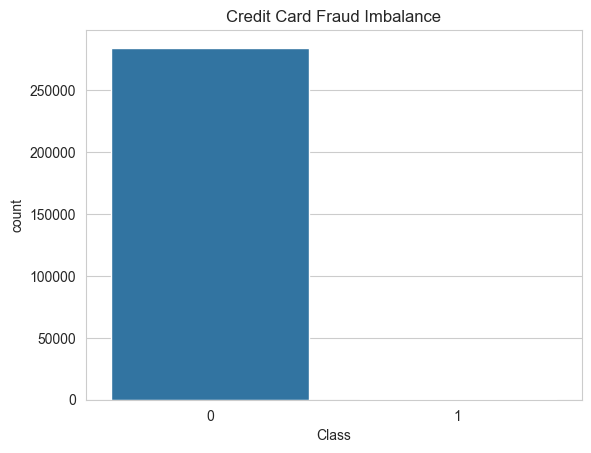

In [17]:
#Target imbalance
sns.countplot(x='Class', data=cc)
plt.title("Credit Card Fraud Imbalance")
plt.show()

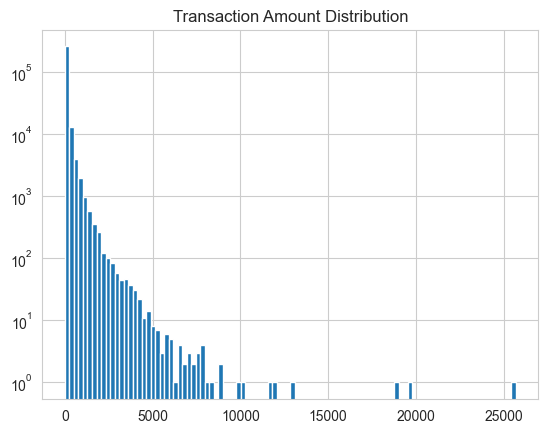

In [18]:
#Amount distribution
plt.hist(cc['Amount'], bins=100)
plt.yscale('log')
plt.title("Transaction Amount Distribution")
plt.show()

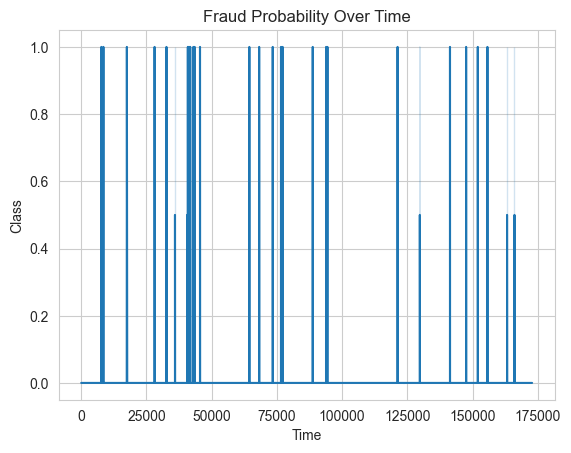

In [19]:
#Time vs fraud
sns.lineplot(x='Time', y='Class', data=cc.sample(20000))
plt.title("Fraud Probability Over Time")
plt.show()

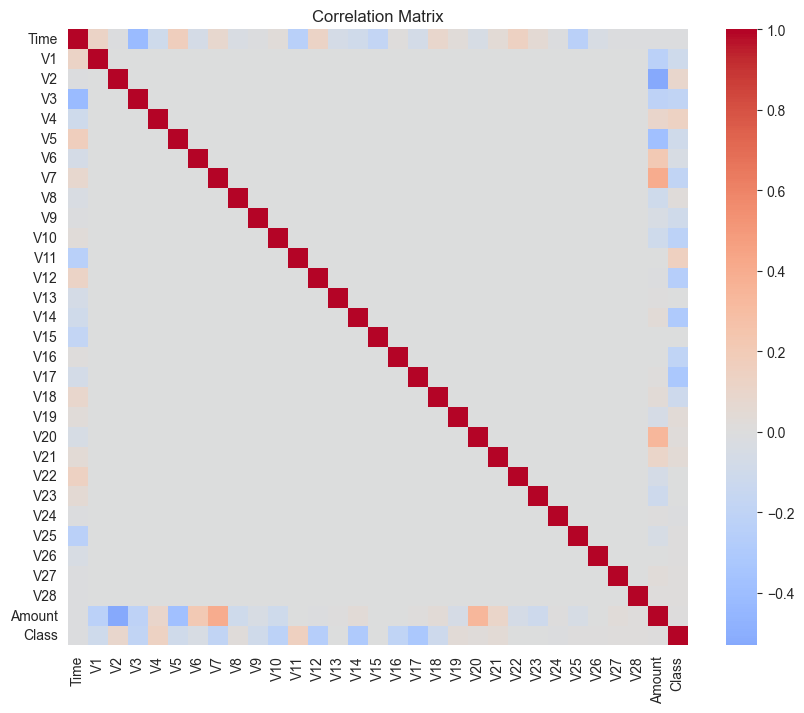

In [20]:
#Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cc.corr(), cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()